In [1]:
from sticks import Sticks
from agents.random_agent import RandomAgent

Sticks(RandomAgent(), RandomAgent(), log=True).play()

{'t': 0, 'state': (1, 1, 1, 1), 'agent': 0, 'action': 0, 'next_state': (1, 1, 1, 2), 'game_over': False}
{'t': 1, 'state': (1, 1, 1, 2), 'agent': 1, 'action': 0, 'next_state': (1, 2, 1, 2), 'game_over': False}
{'t': 2, 'state': (1, 2, 1, 2), 'agent': 0, 'action': 2, 'next_state': (1, 2, 2, 3), 'game_over': False}
{'t': 3, 'state': (1, 2, 2, 3), 'agent': 1, 'action': 1, 'next_state': (1, 4, 2, 3), 'game_over': False}
{'t': 4, 'state': (1, 4, 2, 3), 'agent': 0, 'action': 1, 'next_state': (1, 4, 2, 4), 'game_over': False}
{'t': 5, 'state': (1, 4, 2, 4), 'agent': 1, 'action': 2, 'next_state': (0, 4, 2, 4), 'game_over': False}
{'t': 6, 'state': (0, 4, 2, 4), 'agent': 0, 'action': 4, 'next_state': (2, 2, 2, 4), 'game_over': False}
{'t': 7, 'state': (2, 2, 2, 4), 'agent': 1, 'action': 1, 'next_state': (2, 4, 2, 4), 'game_over': False}
{'t': 8, 'state': (2, 4, 2, 4), 'agent': 0, 'action': 1, 'next_state': (2, 4, 0, 2), 'game_over': False}
{'t': 9, 'state': (2, 4, 0, 2), 'agent': 1, 'action': 3

In [2]:
from functions import build_game_tree, print_tree

game_tree, visited = build_game_tree()
print_tree(game_tree, max_depth=3)
print(f'visited {len(visited)} states')

{
  (0, 1, 1, 1, 1): {
    (1, 1, 1, 1, 2): {
      (0, 1, 3, 1, 2): {...},
      (0, 1, 2, 1, 2): {...}
    }
  }
}
visited 306 states


In [3]:
from functions import get_tree_lengths

lengths = get_tree_lengths(game_tree)
print(f'tree had {len(lengths)} levels, first five levels are {lengths[:5]}')

tree had 98 levels, first five levels are [1, 1, 2, 8, 8]


In [4]:
from functions import build_winner_map

winner_map, visited = build_winner_map()

count = len([key for key in winner_map.keys() if not key.is_terminal()])

print(f'visited {len(visited)} states')
print(f'winner map has {len(winner_map)} states, {count} are not terminal')

visited 306 states
winner map has 46 states, 24 are not terminal


In [5]:
def count_intersection(tree):
  _count = 0
  for state, next_state in tree.items():
    if state in winner_map:
      _count += 1
    if isinstance(next_state, dict):
      _count += count_intersection(next_state)

  return _count

print(f'intersection between game tree and winner map is {count_intersection(game_tree)} states')

intersection between game tree and winner map is 94 states


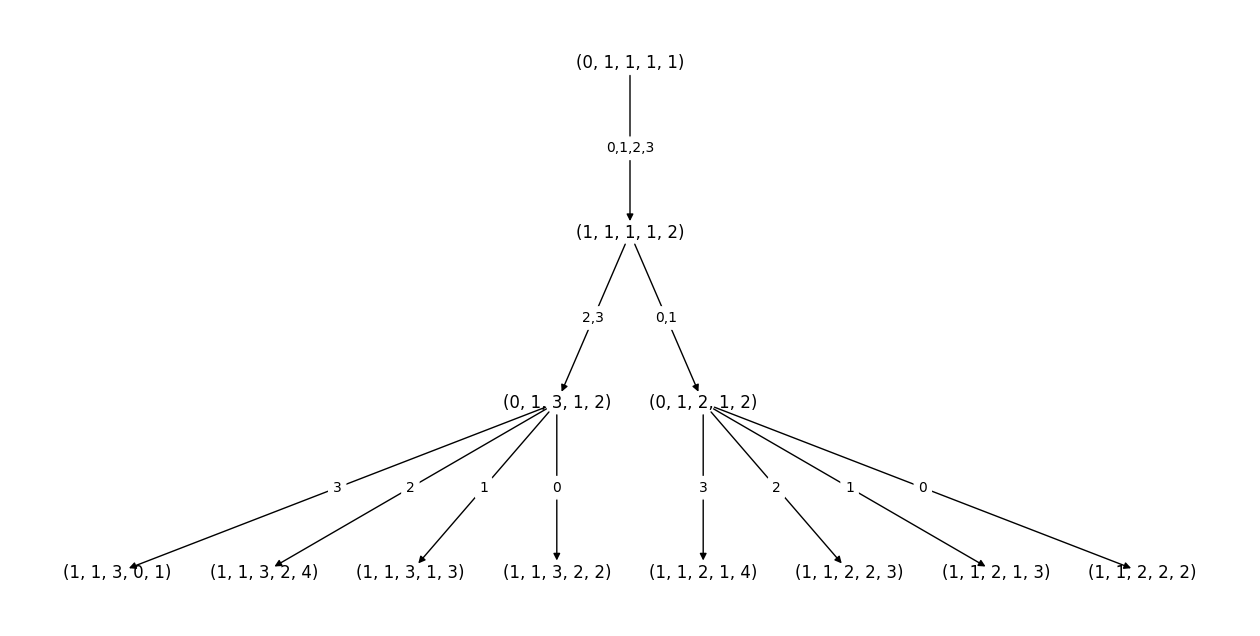

In [6]:
from functions import build_and_draw_tree

build_and_draw_tree(max_depth=3, figure_size=(16, 8))

In [ ]:
build_and_draw_tree(max_depth=5, figure_size=(70, 30), file_name='tree.svg')